In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

In [3]:
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
with open("marketing_AB.csv", "r", encoding='utf8') as file:
    file_csv = pd.read_csv(file)
    df = pd.DataFrame(file_csv) 

In [5]:
# Convert boolean 'converted' column to integer
df['converted'] = df['converted'].astype(int)


In [6]:
# Exploratory Data Analysis (EDA)

# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
# data = data[data['total ads'] < 1000]

Basic Statistics:
          Unnamed: 0       user id      converted      total ads  \
count  588101.000000  5.881010e+05  588101.000000  588101.000000   
mean   294050.000000  1.310692e+06       0.025239      24.820876   
std    169770.279668  2.022260e+05       0.156850      43.715181   
min         0.000000  9.000000e+05       0.000000       1.000000   
25%    147025.000000  1.143190e+06       0.000000       4.000000   
50%    294050.000000  1.313725e+06       0.000000      13.000000   
75%    441075.000000  1.484088e+06       0.000000      27.000000   
max    588100.000000  1.654483e+06       1.000000    2065.000000   

       most ads hour  
count  588101.000000  
mean       14.469061  
std         4.834634  
min         0.000000  
25%        11.000000  
50%        14.000000  
75%        18.000000  
max        23.000000  

Missing Values:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
# Plotting functions
def plot_countplot(column, title, xlabel, ylabel, color='#008080'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def plot_histogram(column, bins, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [9]:
def plot_boxplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=df, color = '#CC7722')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

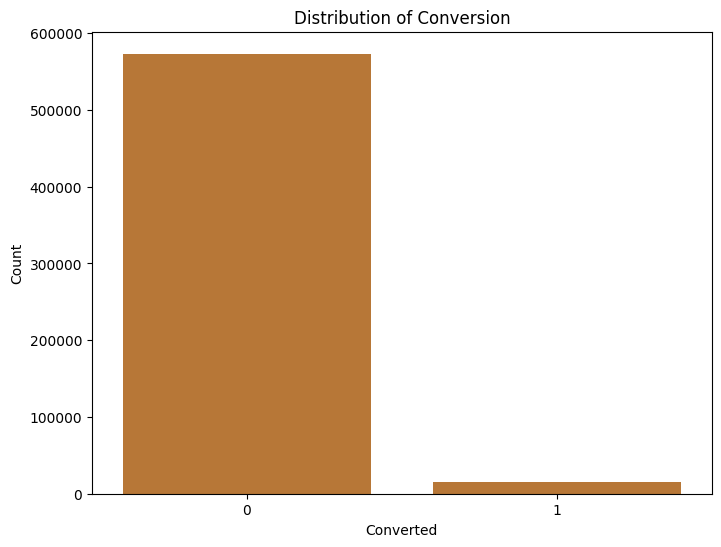

In [10]:
# Distribution of converted
plot_countplot('converted', 'Distribution of Conversion', 'Converted', 'Count', color='#CC7722')

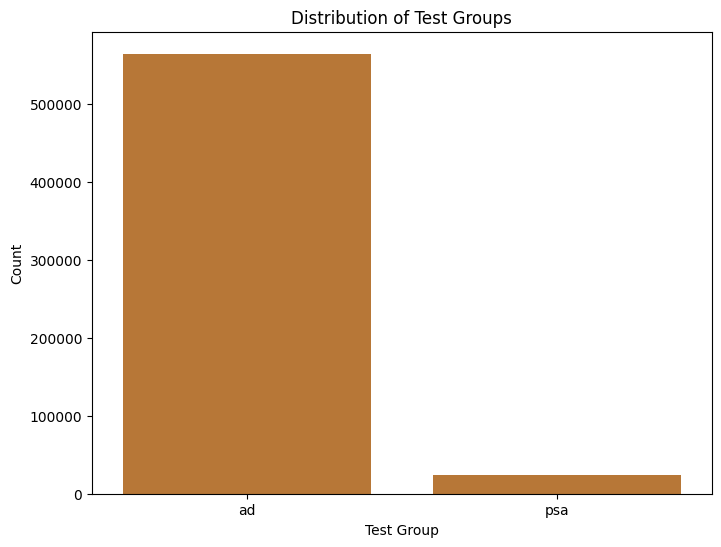

In [11]:
# Distribution of test group
plot_countplot('test group', 'Distribution of Test Groups', 'Test Group', 'Count', color='#CC7722')

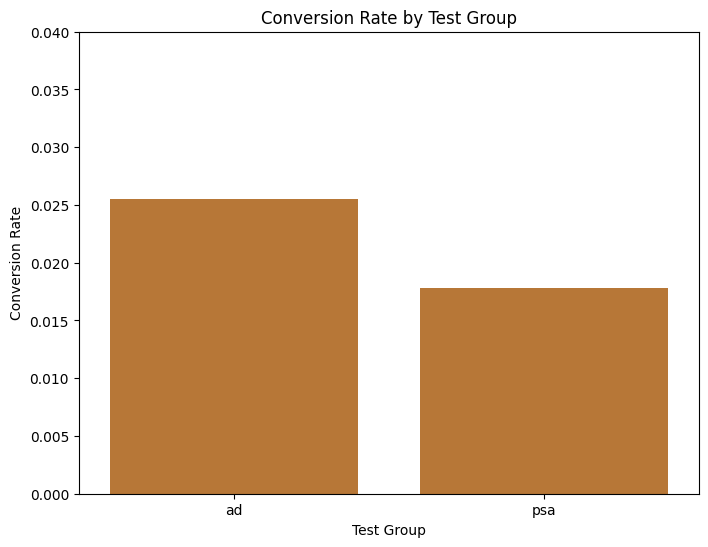

In [12]:
# Conversion rate by test group
conversion_rate = df.groupby('test group')['converted'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=conversion_rate, color = '#CC7722')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.04)
plt.show()

In [13]:
# Remove outliers for conversion rate by total ads seen
Q1 = df['total ads'].quantile(0.25)
Q3 = df['total ads'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = df[(df['total ads'] >= (Q1 - 1.5 * IQR)) & (df['total ads'] <= (Q3 + 1.5 * IQR))]

In [30]:
# Conversion rate by total ads seen (box plot without outliers)
# plot_boxplot('converted', 'total ads', 'Total Ads Seen by Conversion Status (Without Outliers)', 'Converted', 'Total Ads')

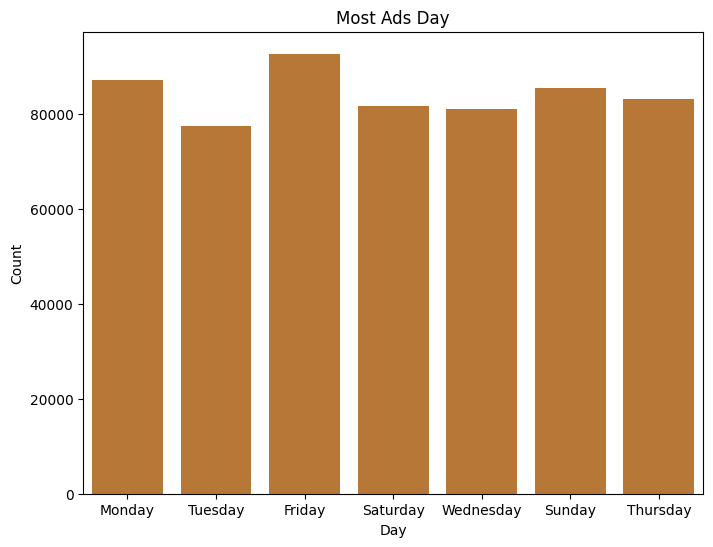

In [14]:
# Most ads day (same color)
plot_countplot('most ads day', 'Most Ads Day', 'Day', 'Count', color='#CC7722')


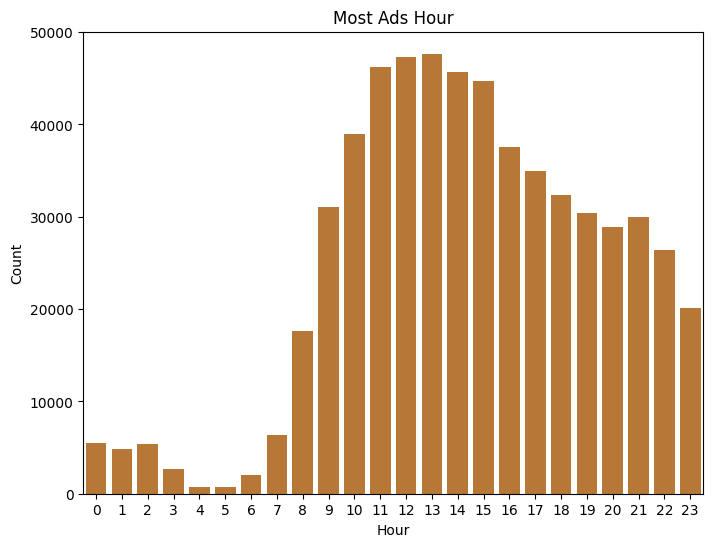

In [15]:
# Most ads hour (same color)
plot_countplot('most ads hour', 'Most Ads Hour', 'Hour', 'Count', color='#CC7722')

In [16]:
# A/B Testing
control_group = df[df['test group'] == 'psa']
experimental_group = df[df['test group'] == 'ad']

control_conversion_rate = control_group['converted'].mean()
experimental_conversion_rate = experimental_group['converted'].mean()

print(f"Control Conversion Rate: {control_conversion_rate:.2%}")
print(f"Experimental Conversion Rate: {experimental_conversion_rate:.2%}")

# Manual z-test for proportions
count_control = control_group['converted'].sum()
count_experimental = experimental_group['converted'].sum()
n_control = control_group['converted'].count()
n_experimental = experimental_group['converted'].count()

p1 = count_control / n_control
p2 = count_experimental / n_experimental
p_combined = (count_control + count_experimental) / (n_control + n_experimental)
z_stat = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n_control + 1/n_experimental))
p_value = stats.norm.sf(abs(z_stat)) * 2  # Two-tailed test

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

relative_difference = (experimental_conversion_rate - control_conversion_rate) / control_conversion_rate * 100

print(f"Relative Difference: {relative_difference:.2f}%")

Control Conversion Rate: 1.79%
Experimental Conversion Rate: 2.55%
Z-statistic: -7.37
P-value: 0.0000
Relative Difference: 43.09%


(0.0, 0.04)

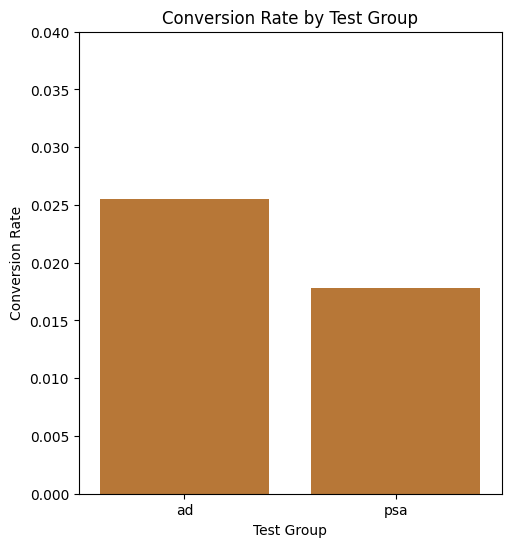

In [17]:
# Plot Results
plt.figure(figsize=(12, 6))

# Subplot 1: Conversion Rate by Test Group
plt.subplot(1, 2, 1)
sns.barplot(x='test group', y='converted', data=conversion_rate, color= '#CC7722')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.04)

In [18]:
# Convert 'most ads day' to a categorical data type with the correct order
df['most ads day'] = pd.Categorical(df['most ads day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)


In [19]:
df['most ads hour'] = pd.to_numeric(df['most ads hour'], errors='coerce')


In [20]:
# Ensure 'converted' is binary (0 or 1)
df['converted'] = df['converted'].astype(int)

# Group by weekday and hour and calculate conversion rate
weekday_conversion = df.groupby('most ads day')['converted'].mean()
hour_conversion = df.groupby('most ads hour')['converted'].mean()


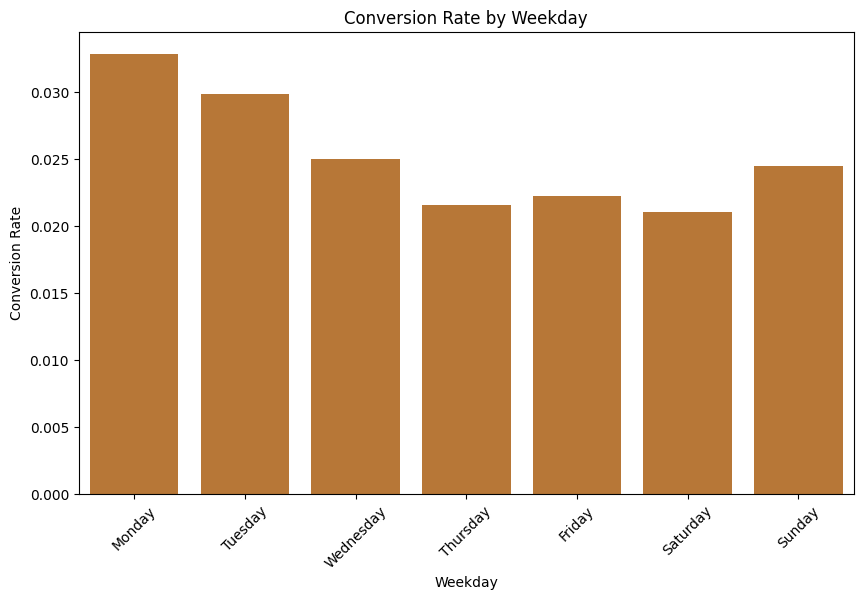

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_conversion.index, y=weekday_conversion.values, color='#CC7722')
plt.title('Conversion Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


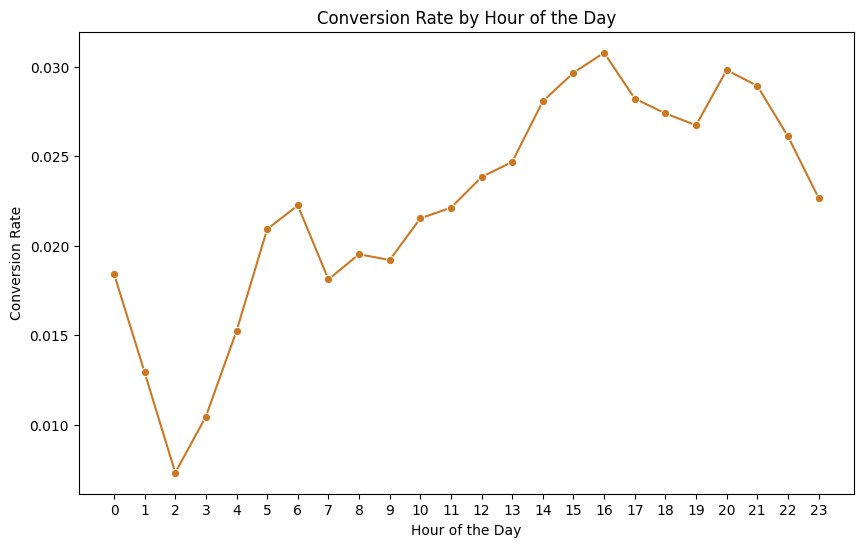

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_conversion.index, y=hour_conversion.values, marker='o', color='#CC7722')
plt.title('Conversion Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.grid(False)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_20768\1887936908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[group_column] = data[group_column].astype('category')
C:\Users\admin\AppData\Local\Temp\ipykernel_20768\1887936908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[conversion_column] = data[conversion_column].astype('category')


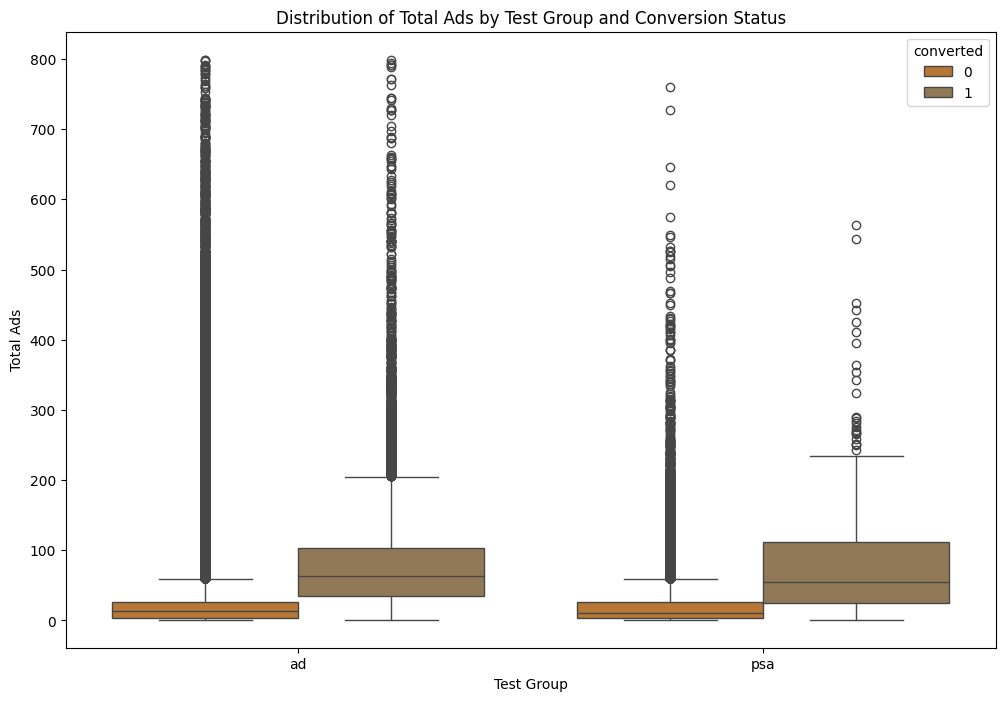

In [23]:

def plot_boxplot_by_group_and_conversion(data, group_column, conversion_column, value_column, title, xlabel, ylabel, color_palette):
    # Ensure the group_column and conversion_column are categorical
    data[group_column] = data[group_column].astype('category')
    
    data[conversion_column] = data[conversion_column].astype('category')

#Plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x=group_column, 
        y=value_column, 
        hue=conversion_column,
        data=data,
        palette=color_palette
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=conversion_column)
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.show()

#Usage example
custom_palette = {0: '#CC7722', 1: '#9A7B4F'}
plot_boxplot_by_group_and_conversion(
    df[df['total ads'] < 800],
    'test group',         # Column indicating the test group
    'converted',          # Column indicating conversion status
    'total ads',          # Column with values to plot
    'Distribution of Total Ads by Test Group and Conversion Status',  # Title
    'Test Group',         # X-axis label
    'Total Ads',          # Y-axis label
    custom_palette               # Color palette (you can use 'Set1' or any seaborn color palette)
)

In [27]:
df_ad = df[df['test group'] == 'ad']
conversion_hour_ad = pd.crosstab(df_ad['most ads hour'], df_ad['converted'])
# Extract counts of True conversions for each hour from the crosstab
print(conversion_hour_ad.columns)


Index([0, 1], dtype='int32', name='converted')


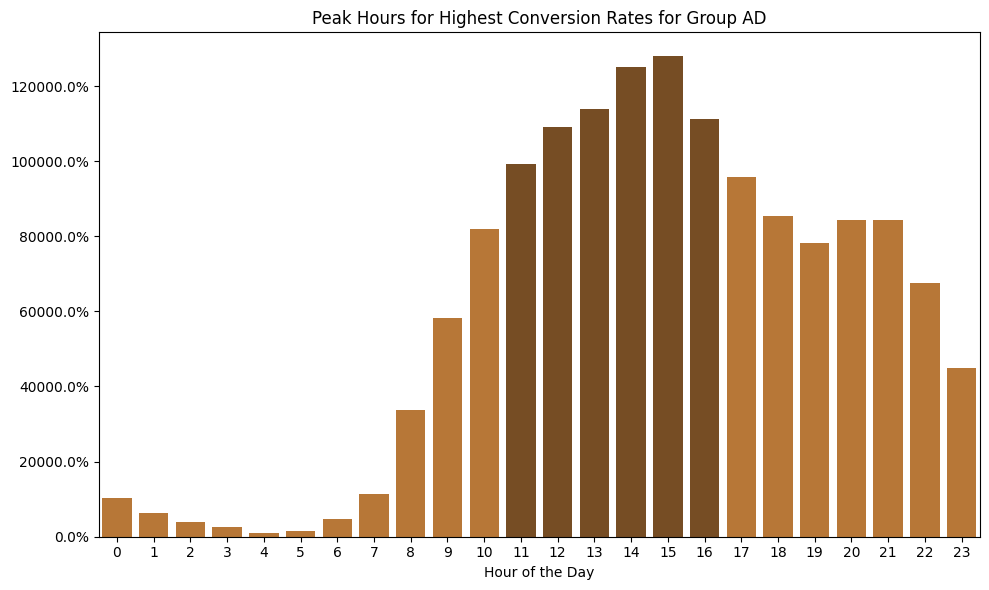

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ad = df[df['test group'] == 'ad']
conversion_hour_ad = pd.crosstab(df_ad['most ads hour'], df_ad['converted'])
# Extract counts of True conversions for each hour from the crosstab
true_conversions = conversion_hour_ad[1]

# Convert the counts to percentages
true_conversions_percentage = true_conversions * 100

# Ensure the hours are ordered correctly
hours_order = list(range(24))
true_conversions_percentage = true_conversions_percentage.reindex(hours_order, fill_value=0)

# Sort the counts to identify the top 5 hours
sorted_true_conversions_percentage = true_conversions_percentage.sort_values(ascending=False)
top5_hours = sorted_true_conversions_percentage.head(6).index

# Create a color palette with default and darker colors for top 5
colors = ['#CC7722' if hour not in top5_hours else '#844d16' for hour in hours_order]

# Create a figure
plt.figure(figsize=(10, 6))

# Bar plot with custom colors for the top 5 highest columns
ax = sns.barplot(x=true_conversions_percentage.index, y=true_conversions_percentage.values, palette=colors)
plt.xlabel("Hour of the Day")
plt.ylabel("")
plt.title('Peak Hours for Highest Conversion Rates for Group AD')

# Format the y-axis to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
